In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply

/data/software/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
hdf_path = "../datasets/MPIIGaze_kaggle_students.h5"
hdf5 = h5py.File(hdf_path, 'r')
validation_true = hdf5["validation"]["gaze"]

validation_pred = pd.read_csv('densenetreg_validation_pred.csv')

df = pd.DataFrame(validation_true.value, columns=['pitch_true', 'yaw_true'])
df['pitch_pred'] = validation_pred['pitch']
df['yaw_pred'] = validation_pred['yaw']

df['pitch_diff'] = df['pitch_pred'] - df['pitch_true']
df['yaw_diff'] = df['yaw_pred'] - df['yaw_true']


print(df.head())

   pitch_true  yaw_true  pitch_pred  yaw_pred  pitch_diff  yaw_diff
0   -0.284043 -0.071925   -0.250504 -0.053056    0.033539  0.018869
1   -0.242470  0.209679   -0.197631  0.175609    0.044839 -0.034070
2   -0.190234 -0.055988   -0.174017  0.047527    0.016218  0.103515
3   -0.279683 -0.219014   -0.275358 -0.131513    0.004325  0.087502
4   -0.031439  0.008008   -0.105076  0.049710   -0.073637  0.041703


In [9]:
print(np.sqrt(np.sum(np.square(df['pitch_diff'])))/df.size)

0.0002162183613741627


In [19]:
color1 = [1,0,0,.5]
color2 = [0,1,0,.5]

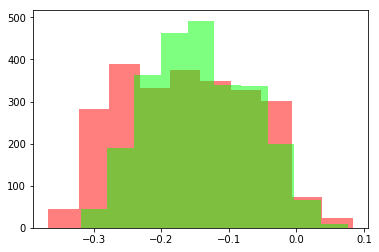

In [20]:
ply.hist(df.pitch_true, fc=color1)
ply.hist(df.pitch_pred, fc=color2)
ply.show()

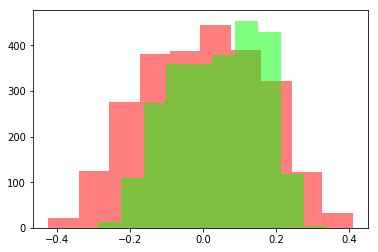

In [21]:
ply.hist(df.yaw_true, fc=color1)
ply.hist(df.yaw_pred, fc=color2)
ply.show()

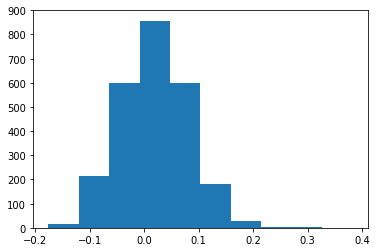

In [13]:
ply.hist(df.pitch_diff)
ply.show()

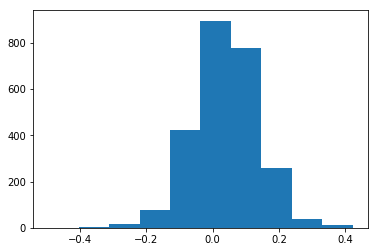

In [14]:
ply.hist(df.yaw_diff)
ply.show()